In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#Normalize the data
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
x_train = x_train.reshape(-1,28,28,1)

In [34]:
x_test=x_test.reshape(-1,28,28,1)

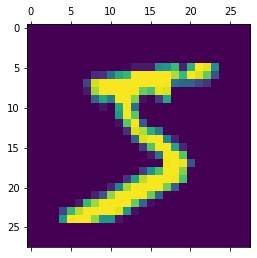

In [4]:
plt.matshow(x_train[0])

In [30]:
#Create a model:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28,28,1)),
    keras.layers.Conv2D(24,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('val_accuracy')>0.9939):
      print("\nReached 99.39% accuracy so cancelling training!")
      self.model.stop_training=True
callbacks = myCallback()

In [54]:
model.fit(x_train,y_train,epochs=100,callbacks=[callbacks],validation_data=(x_test,y_test))

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0114 - accuracy: 0.9966 - val_loss: 0.0371 - val_accuracy: 0.9928
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0408 - val_accuracy: 0.9927
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.0381 - val_accuracy: 0.9927
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0341 - val_accuracy: 0.9923
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.0359 - val_accuracy: 0.9923
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0335 - val_accuracy: 0.9923
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0361 - val_ac

In [56]:
model.save('cnn_digits.model')

In [57]:
model = tf.keras.models.load_model('cnn_digits.model')

In [58]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0329 - accuracy: 0.9943


[0.03286086022853851, 0.9943000078201294]

In [59]:
predicted = model.predict(x_test)

In [60]:
predicted_labels= [numpy.argmax(i) for i in predicted]

In [61]:
c_matrix = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
c_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1029,    0,    0,    0,    1,    1,    0,    0],
       [   0,    1,    0, 1007,    0,    1,    0,    0,    1,    0],
       [   0,    0,    0,    0,  978,    0,    0,    0,    1,    3],
       [   1,    0,    0,    5,    0,  884,    1,    0,    0,    1],
       [   1,    2,    0,    0,    1,    3,  948,    0,    3,    0],
       [   0,    2,    1,    1,    0,    0,    0, 1023,    1,    0],
       [   0,    0,    1,    0,    0,    1,    0,    1,  969,    2],
       [   0,    0,    0,    0,    7,    3,    0,    3,    2,  994]],
      dtype=int32)>

Let's try the model on some data we created in paint

In [65]:
import cv2
import numpy as np

In [70]:
images = [2,3,4,7,9,0,6,1,5]
for i in images:
  img = cv2.imread(f'test{i}.png')
  img = np.invert(img[:,:,0])/255
  img = img.reshape(1,28,28,1)
  print(f'Image file test{i} is probably {numpy.argmax(model.predict(img))}')

Image file test2 is probably 2
Image file test3 is probably 3
Image file test4 is probably 4
Image file test7 is probably 7
Image file test9 is probably 9
Image file test0 is probably 2
Image file test6 is probably 6
Image file test1 is probably 1
Image file test5 is probably 5


Great Performance!